# Problem Set 1 - Neural network implementation

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a shallow neural network from scratch using different approaches. To validate that your code is working and that the network is actually learning something, please use the following MNIST classification task. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn import model_selection
import sklearn.datasets as sk_datasets
import torchvision.datasets as torch_datasets
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

from scratch.network import Network
from scratch.res_network import ResNetwork
from pytorch.network import TorchNetwork
from scratch.utils import *

In [2]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

## A) Neural Network Classifier from Scratch

### Data

In [3]:
# Download MNIST dataset
x, y_cat = sk_datasets.fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y_cat = y_cat.astype(int)
# One-hot encode y
y = np.zeros((len(y_cat), 10))
for i, val in enumerate(y_cat):
    y[i, val] = 1

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)



### ML Model & Training

In [6]:
print("\n=== Training Standard Network ===")
fnn = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=50)
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)



=== Training Standard Network ===
Epoch: 1, Training Time: 0.53s, Training Accuracy: 86.88%, Validation Accuracy: 79.00%
Epoch: 2, Training Time: 1.07s, Training Accuracy: 94.00%, Validation Accuracy: 85.50%
Epoch: 3, Training Time: 1.48s, Training Accuracy: 97.00%, Validation Accuracy: 85.50%
Epoch: 4, Training Time: 1.86s, Training Accuracy: 98.88%, Validation Accuracy: 88.00%
Epoch: 5, Training Time: 2.28s, Training Accuracy: 99.50%, Validation Accuracy: 88.50%
Epoch: 6, Training Time: 2.73s, Training Accuracy: 99.88%, Validation Accuracy: 88.00%
Epoch: 7, Training Time: 3.11s, Training Accuracy: 100.00%, Validation Accuracy: 88.50%
Epoch: 8, Training Time: 3.64s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 9, Training Time: 4.04s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 10, Training Time: 4.44s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 11, Training Time: 4.90s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
E

### Test cosine annealing scheduler

In [11]:
print("\n=== Training Network with Cosine Annealing ===")
fnn_cosine = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=50)
fnn_cosine.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)
#fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)


=== Training Network with Cosine Annealing ===
Epoch: 1, Training Time: 0.42s, Training Accuracy: 86.88%, Validation Accuracy: 79.00%
Epoch: 2, Training Time: 0.88s, Training Accuracy: 94.00%, Validation Accuracy: 85.50%
Epoch: 3, Training Time: 1.28s, Training Accuracy: 97.00%, Validation Accuracy: 85.50%
Epoch: 4, Training Time: 1.67s, Training Accuracy: 98.88%, Validation Accuracy: 88.00%
Epoch: 5, Training Time: 2.12s, Training Accuracy: 99.50%, Validation Accuracy: 88.50%
Epoch: 6, Training Time: 2.56s, Training Accuracy: 99.88%, Validation Accuracy: 88.00%
Epoch: 7, Training Time: 2.98s, Training Accuracy: 100.00%, Validation Accuracy: 88.50%
Epoch: 8, Training Time: 3.41s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 9, Training Time: 3.86s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 10, Training Time: 4.27s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 11, Training Time: 4.79s, Training Accuracy: 100.00%, Validation Accur

### Test residual neural network

In [14]:
print("\n=== Training Residual Network ===")
res_nn = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=0.1, epochs=50)
res_nn.fit(x_train, y_train, x_val, y_val)


=== Training Residual Network ===
Epoch: 1, Training Time: 0.51s, Training Accuracy: 89.50%, Validation Accuracy: 84.50%
Epoch: 2, Training Time: 0.92s, Training Accuracy: 94.50%, Validation Accuracy: 86.00%
Epoch: 3, Training Time: 1.34s, Training Accuracy: 98.12%, Validation Accuracy: 86.50%
Epoch: 4, Training Time: 1.77s, Training Accuracy: 98.75%, Validation Accuracy: 88.50%
Epoch: 5, Training Time: 2.21s, Training Accuracy: 99.75%, Validation Accuracy: 87.50%
Epoch: 6, Training Time: 2.64s, Training Accuracy: 100.00%, Validation Accuracy: 87.00%
Epoch: 7, Training Time: 3.16s, Training Accuracy: 100.00%, Validation Accuracy: 87.50%
Epoch: 8, Training Time: 3.61s, Training Accuracy: 100.00%, Validation Accuracy: 87.50%
Epoch: 9, Training Time: 4.03s, Training Accuracy: 100.00%, Validation Accuracy: 88.00%
Epoch: 10, Training Time: 4.46s, Training Accuracy: 100.00%, Validation Accuracy: 87.50%
Epoch: 11, Training Time: 4.91s, Training Accuracy: 100.00%, Validation Accuracy: 87.50%


## B) Neural Network Classifier using Torch

### Data

In [15]:
# Define data preprocessing steps
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = torch_datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = torch_datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


### ML Model & Training

In [16]:
print("\n=== Training PyTorch Network ===")
torch_nn = TorchNetwork(
    sizes=[784, 128, 64, 10], 
    learning_rate=0.1, 
    epochs=50, 
    random_state=GLOBAL_RANDOM_STATE
)
torch_nn.fit(train_loader, val_loader)


=== Training PyTorch Network ===
Epoch: 1, Training Time: 4.48s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 2, Training Time: 8.92s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 3, Training Time: 13.39s, Learning Rate: 0.1, Training Accuracy: 32.80%, Validation Accuracy: 29.80%
Epoch: 4, Training Time: 17.88s, Learning Rate: 0.1, Training Accuracy: 42.70%, Validation Accuracy: 39.60%
Epoch: 5, Training Time: 22.68s, Learning Rate: 0.1, Training Accuracy: 53.30%, Validation Accuracy: 49.60%
Epoch: 6, Training Time: 28.45s, Learning Rate: 0.1, Training Accuracy: 62.10%, Validation Accuracy: 56.40%
Epoch: 7, Training Time: 34.44s, Learning Rate: 0.1, Training Accuracy: 68.10%, Validation Accuracy: 62.60%
Epoch: 8, Training Time: 39.78s, Learning Rate: 0.1, Training Accuracy: 73.70%, Validation Accuracy: 67.20%
Epoch: 9, Training Time: 45.37s, Learning Rate: 0.1, Training Accuracy: 78.20%, Validation Accuracy: 69.50

## C) Visualize accuracy & hyperparameter tuning

Here, you should compare the accuracy of all trained models. Optionally, you can also show the results of hyperparameter tuning and comment which hyperparameters work best for this task.

In [20]:
###  Visualisation for comparing the models ###
import matplotlib.pyplot as plt
import numpy as np
from scratch.network import Network
from scratch.res_network import ResNetwork
from pytorch.network import TorchNetwork

print("TRAINING ALL MODELS (30 EPOCHS)")

# 1. Standard Network (no cosine annealing)
print("\n[1/4] Training Standard Network...")
fnn_standard = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=30)
fnn_standard.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)

# 2. Network with Cosine Annealing
print("\n[2/4] Training Network with Cosine Annealing...")
fnn_cosine = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=30)
fnn_cosine.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)

# 3. Residual Network
print("\n[3/4] Training Residual Network...")
res_nn = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=0.1, epochs=30)
res_nn.fit(x_train, y_train, x_val, y_val)

# 4. PyTorch Network
print("\n[4/4] Training PyTorch Network...")
torch_nn = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=30, random_state=GLOBAL_RANDOM_STATE)
torch_nn.fit(train_loader, val_loader)





TRAINING ALL MODELS (30 EPOCHS)

[1/4] Training Standard Network...
Epoch: 1, Training Time: 0.41s, Training Accuracy: 86.88%, Validation Accuracy: 79.00%
Epoch: 2, Training Time: 0.79s, Training Accuracy: 94.00%, Validation Accuracy: 85.50%
Epoch: 3, Training Time: 1.17s, Training Accuracy: 97.00%, Validation Accuracy: 85.50%
Epoch: 4, Training Time: 1.55s, Training Accuracy: 98.88%, Validation Accuracy: 88.00%
Epoch: 5, Training Time: 1.94s, Training Accuracy: 99.50%, Validation Accuracy: 88.50%
Epoch: 6, Training Time: 2.38s, Training Accuracy: 99.88%, Validation Accuracy: 88.00%
Epoch: 7, Training Time: 2.77s, Training Accuracy: 100.00%, Validation Accuracy: 88.50%
Epoch: 8, Training Time: 3.15s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 9, Training Time: 3.53s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 10, Training Time: 3.92s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 11, Training Time: 4.30s, Training Accuracy: 100.0

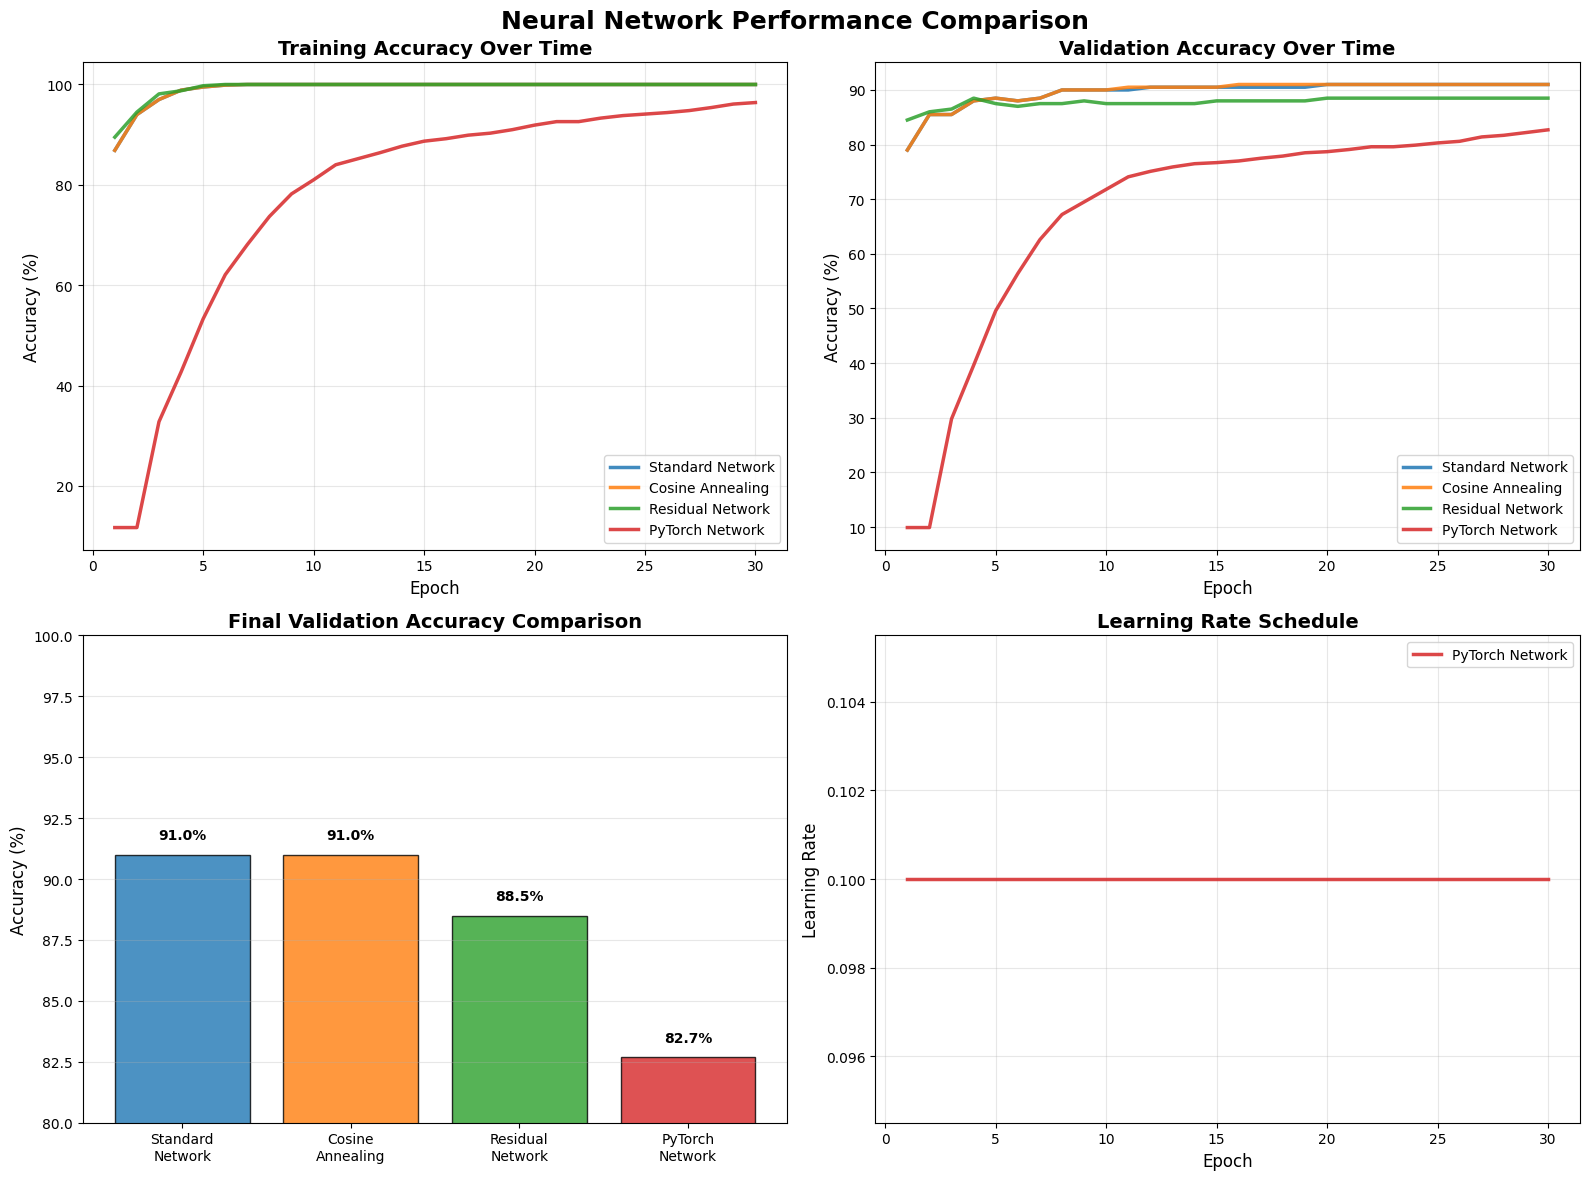


PERFORMANCE SUMMARY
Standard Network          Train: 100.00%  |  Val:  91.00%
Cosine Annealing          Train: 100.00%  |  Val:  91.00%
Residual Network          Train: 100.00%  |  Val:  88.50%
PyTorch Network           Train:  96.40%  |  Val:  82.70%

Best Model: Standard Network (91.00% validation accuracy)


In [22]:
# Collect all models
models = {
    'Standard Network': fnn_standard,
    'Cosine Annealing': fnn_cosine,
    'Residual Network': res_nn,
    'PyTorch Network': torch_nn
}

# Extract final accuracies
final_accuracies = []
for model in models.values():
    if hasattr(model, 'history'):
        final_accuracies.append(model.history['val_accuracy'][-1])
    else:
        final_accuracies.append(0)

#code to compare and visualise

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Neural Network Performance Comparison', fontsize=18, fontweight='bold')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
model_names = list(models.keys())

# 1. Training Accuracy Curves
ax1 = axes[0, 0]
for i, (name, model) in enumerate(models.items()):
    if hasattr(model, 'history'):
        epochs = model.history['epochs']
        train_acc = [acc * 100 for acc in model.history['train_accuracy']]
        ax1.plot(epochs, train_acc, color=colors[i], label=name, linewidth=2.5, alpha=0.85)

ax1.set_title('Training Accuracy Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Validation Accuracy Curves
ax2 = axes[0, 1]
for i, (name, model) in enumerate(models.items()):
    if hasattr(model, 'history'):
        epochs = model.history['epochs']
        val_acc = [acc * 100 for acc in model.history['val_accuracy']]
        ax2.plot(epochs, val_acc, color=colors[i], label=name, linewidth=2.5, alpha=0.85)

ax2.set_title('Validation Accuracy Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Final Performance Comparison
ax3 = axes[1, 0]
val_finals = [acc * 100 for acc in final_accuracies]
bars = ax3.bar(range(len(model_names)), val_finals, color=colors, alpha=0.8, edgecolor='black')

ax3.set_title('Final Validation Accuracy Comparison', fontsize=14, fontweight='bold')
ax3.set_ylabel('Accuracy (%)', fontsize=12)
ax3.set_xticks(range(len(model_names)))
ax3.set_xticklabels([name.replace(' ', '\n') for name in model_names], fontsize=10)
ax3.set_ylim(80, 100)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, acc in zip(bars, val_finals):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Learning Rate Evolution
ax4 = axes[1, 1]
for i, (name, model) in enumerate(models.items()):
    if hasattr(model, 'history') and 'learning_rate' in model.history:
        epochs = model.history['epochs']
        lr = model.history['learning_rate']
        ax4.plot(epochs, lr, color=colors[i], label=name, linewidth=2.5, alpha=0.85)

ax4.set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
ax4.set_xlabel('Epoch', fontsize=12)
ax4.set_ylabel('Learning Rate', fontsize=12)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# SUMMARY STATISTICS


print("\n" + "="*70)
print("PERFORMANCE SUMMARY")
print("="*70)

for i, (name, model) in enumerate(models.items()):
    if hasattr(model, 'history'):
        train = model.history['train_accuracy'][-1] * 100
        val = model.history['val_accuracy'][-1] * 100
        print(f"{name:<25} Train: {train:>6.2f}%  |  Val: {val:>6.2f}%")

print("="*70)

# Determine best model
best_idx = np.argmax(final_accuracies)
best_model = model_names[best_idx]
print(f"\nBest Model: {best_model} ({final_accuracies[best_idx]*100:.2f}% validation accuracy)")
print("="*70)